In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
df = pd.read_csv('results.csv')

In [20]:
def plotPerColumnDistribution(df, nGraphShownl, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique
    [col] < 50]]  # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow , nCol =df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1)// nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow),
                       dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShownl)):
                plt.subplot(nGraphRow, nGraphPerRow, i + 1)
                columnDf = df.iloc[:, i]
                if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):

                   valueCounts = columnDf.value_counts()
                   valueCounts.plot.bar()
                else:
                   columnDf.hist()
                   plt.ylabel('counts')
                   plt.xticks(rotation = 90)
                   plt.title(f'{columnNames[i]} (column {i})')
                   plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
                   plt.show()

In [30]:
def plotCorrelationMatrix(df, graphWidth):
    filename = "my_dataFrame"
    df = df.dropna(axis= 'columns')
    df = df[[col for col in df if df[col].nunique()> 1]]
    if df.shape[1]< 2:
       print(f'No correlation plots shown: the number of non-nan or constant columns ({df.shape[1]}) is less than 2')
    return
    corr = df.corr()
    plt.figure(num = None, figsize = (graphWidth , graphWidth), dpi = 80 , facecolor = 'w', edgecolor = 'k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.colums)), corr.columns , rotation = 90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', frontsize = 15)
    plt.show()

In [37]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include = [np.number])
    df = df.dropna(axis= 'columns')
    df = df[[col for col in df if df[col].nunique()> 1]]
    columnNames = list(df)
    if len(columnNames)> 10:
       columnsNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha = 0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr.coef = %.3f' % corrs[i, j],
                          (0.8,0.2), xycoords= 'axes fraction', ha= 'center',
                          va= 'center', size= textSize)
    plt.suptitle('scatter and Density Plot')
    plt.show()

In [23]:
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


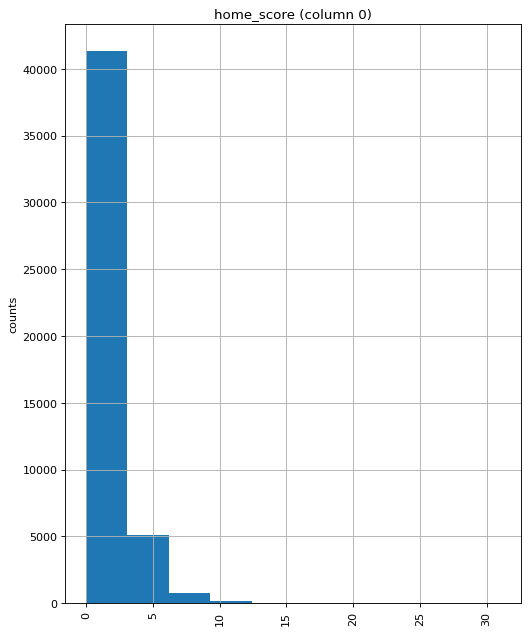

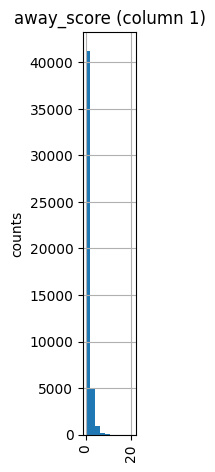

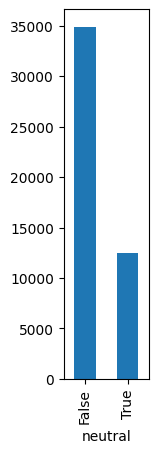

In [24]:
plotPerColumnDistribution(df,10, 5)

In [34]:
plotCorrelationMatrix(df,8)

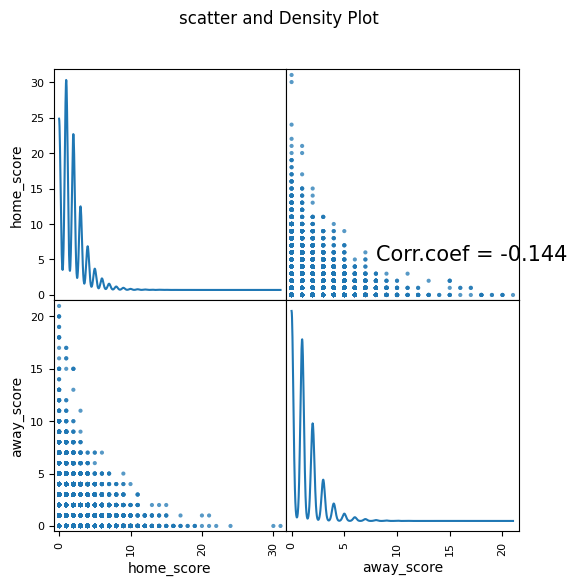

In [38]:
plotScatterMatrix(df , 6, 15)